<a href="https://colab.research.google.com/github/Saksham-tyagi1/building-permits/blob/main/Building_Permits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [ ]:
Building_Permits = '/content/drive/My Drive/Building_Permits.csv'

In [ ]:
df = pd.read_csv(Building_Permits)

<ipython-input-4-b18394796fb8>:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Building_Permits)


In [ ]:
df.head(20)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,NaN,NaN,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,NaN,07/06/2017,NaN,5.0,5.0,NaN,Y,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,0.0,NaN,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,07/12/2017,06/30/2017,NaN,3.0,3.0,NaN,NaN,06/25/2018,12000.0,12000.0,apartments,5.0,apartments,5.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,NaN,NaN,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,NaN,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,NaN,NaN,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,NaN,07/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.452314

In [ ]:
feature_with_na = sorted(
    [feature for feature in df.columns if df[feature].isnull().sum()>1],
    key = lambda feature : df[feature].isnull().sum(),reverse=True)
feature_with_na

['TIDF Compliance',
 'Voluntary Soft-Story Retrofit',
 'Unit Suffix',
 'Street Number Suffix',
 'Site Permit',
 'Structural Notification',
 'Fire Only Permit',
 'Unit',
 'Completed Date',
 'Permit Expiration Date',
 'Existing Units',
 'Proposed Units',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Number of Proposed Stories',
 'Number of Existing Stories',
 'Proposed Use',
 'Existing Use',
 'Estimated Cost',
 'Plansets',
 'First Construction Document Date',
 'Issued Date',
 'Revised Cost',
 'Street Suffix',
 'Neighborhoods - Analysis Boundaries',
 'Supervisor District',
 'Zipcode',
 'Location',
 'Description']

In [ ]:
missing_percentages = df[feature_with_na].isnull().mean().sort_values(ascending=False)
missing_percentages * 100

,0
TIDF Compliance,99.998994
Voluntary Soft-Story Retrofit,99.982403
Unit Suffix,99.014077
Street Number Suffix,98.885872
Site Permit,97.305681
Structural Notification,96.519859
Fire Only Permit,90.534439
Unit,85.178984
Completed Date,51.135747
Permit Expiration Date,26.083459


In [ ]:
features_to_drop = missing_percentages[missing_percentages > 0.26].index
df.drop(features_to_drop,axis=1,inplace=True)
df.shape

(198900, 33)

In [ ]:
missing_percentages = df.isnull().mean().sort_values(ascending=False)
missing_percentages * 100


,0
Existing Units,25.911513
Proposed Units,25.596280
Existing Construction Type,21.802916
Existing Construction Type Description,21.802916
Proposed Construction Type Description,21.700352
Proposed Construction Type,21.700352
Number of Proposed Stories,21.552539
Number of Existing Stories,21.510307
Proposed Use,21.336853
Existing Use,20.670689


In [ ]:
numerical_with_nan = sorted(
    [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='0'],
    key=lambda feature:df[feature].isnull().sum(),reverse=True)
numerical_with_nan

['Existing Units',
 'Proposed Units',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Number of Proposed Stories',
 'Number of Existing Stories',
 'Proposed Use',
 'Existing Use',
 'Estimated Cost',
 'Plansets',
 'First Construction Document Date',
 'Issued Date',
 'Revised Cost',
 'Street Suffix',
 'Neighborhoods - Analysis Boundaries',
 'Supervisor District',
 'Zipcode',
 'Location',
 'Description']

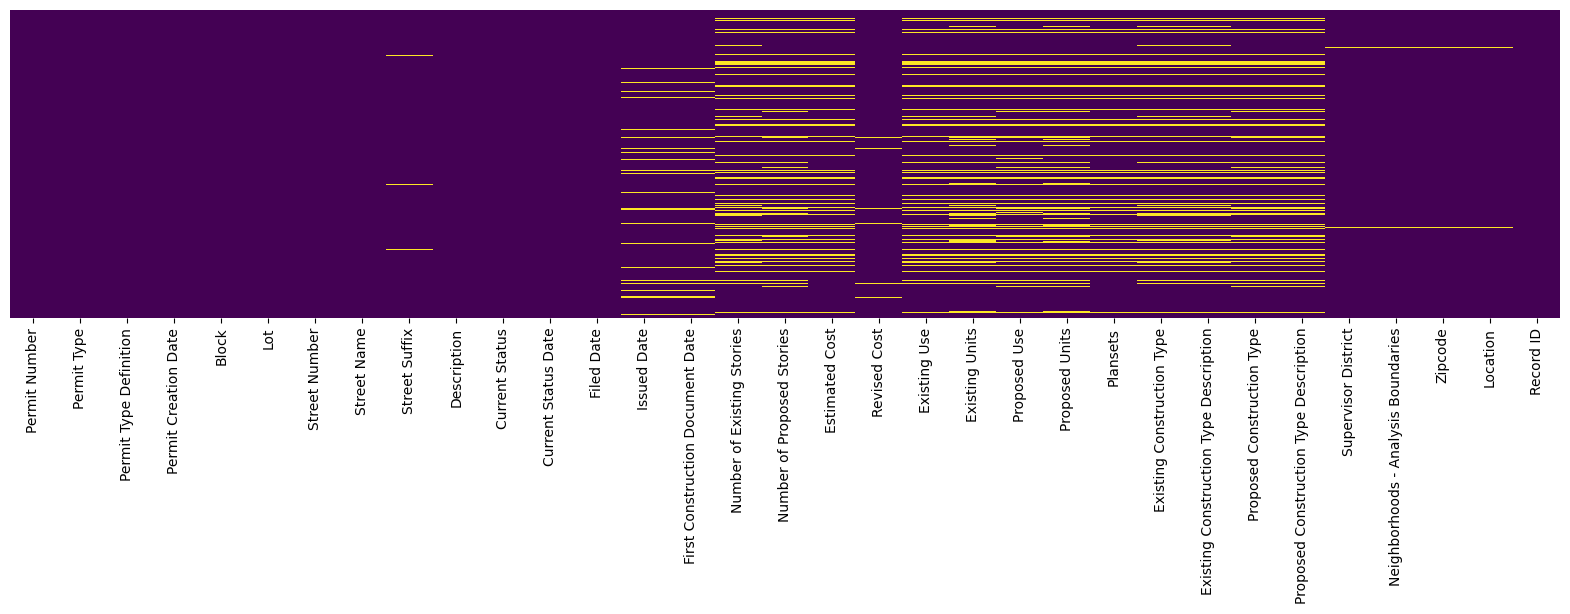

In [ ]:
plt.figure(figsize=(20,4))
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
df.dropna(subset=['Description', 'Location', 'Zipcode', 'Neighborhoods - Analysis Boundaries', 'Supervisor District', 'Street Suffix'], inplace=True)


In [ ]:
numerical_with_nan = sorted(
    [feature for feature in df.columns if df[feature].isnull().sum()>1 and pd.api.types.is_numeric_dtype(df[feature])],
    key=lambda feature:df[feature].isnull().sum(),reverse=True)
numerical_with_nan

['Existing Units',
 'Proposed Units',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Number of Proposed Stories',
 'Number of Existing Stories',
 'Estimated Cost',
 'Plansets',
 'Revised Cost']

<ipython-input-14-54f2bccf38b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],bins=20,kde=False)


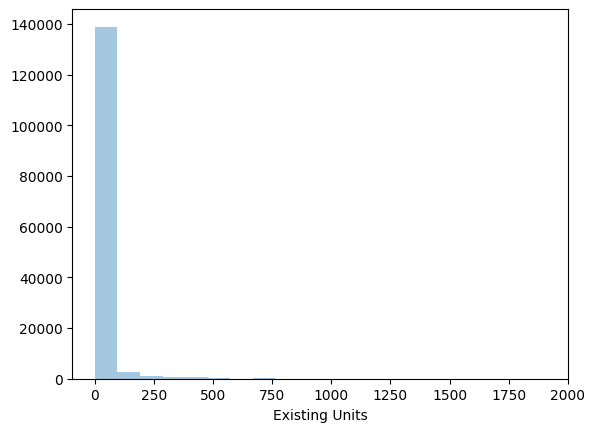

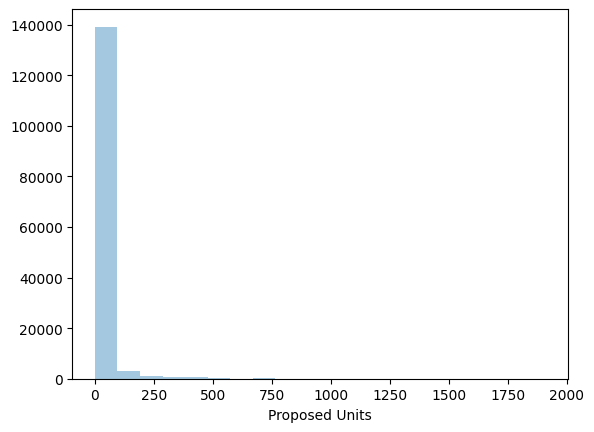

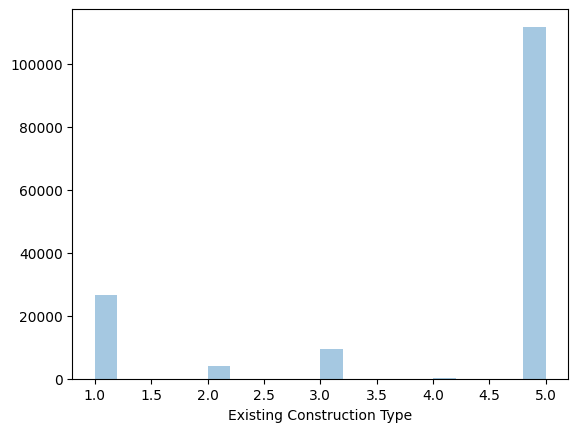

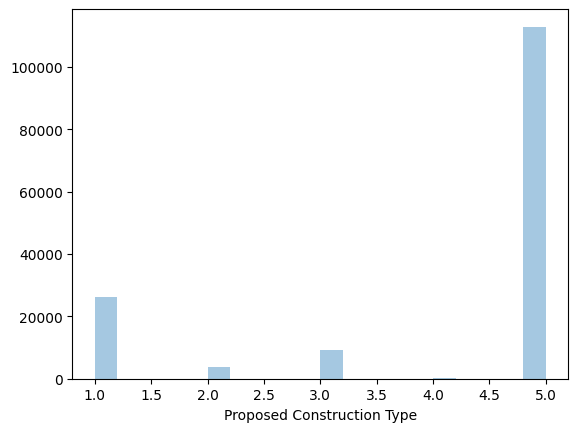

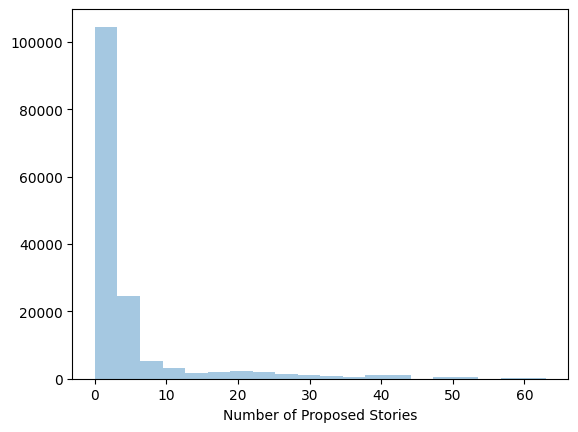

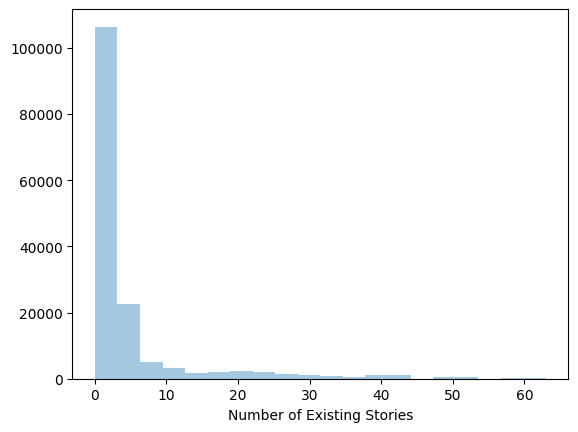

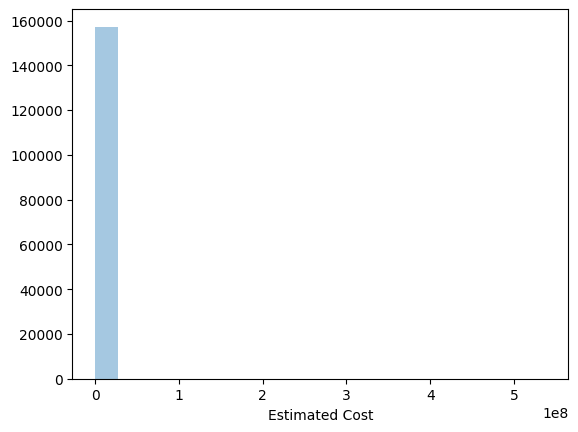

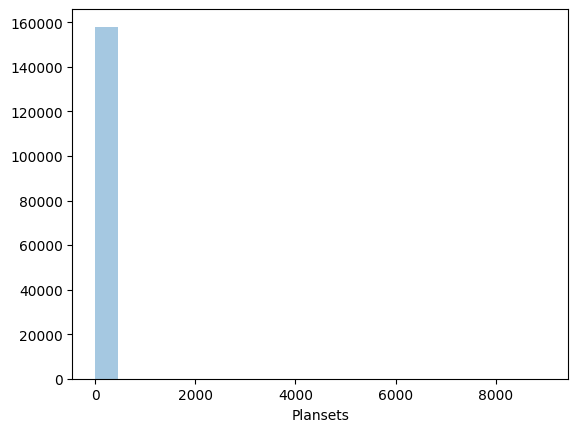

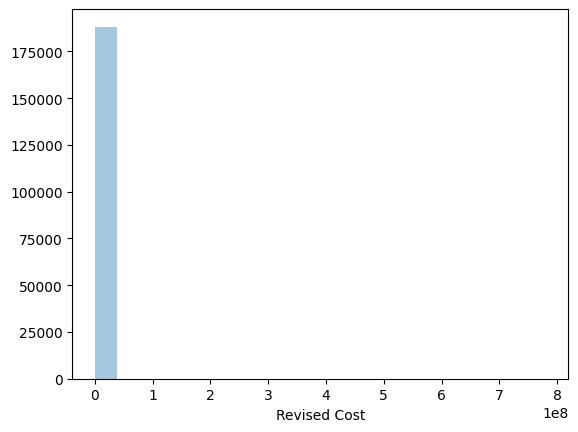

In [ ]:
for feature in numerical_with_nan:
  sns.distplot(df[feature],bins=20,kde=False)
  plt.show()

In [ ]:
df[numerical_with_nan] = df[numerical_with_nan].fillna(df[numerical_with_nan]).median()

<ipython-input-15-9f24d4210b74>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[numerical_with_nan] = df[numerical_with_nan].fillna(df[numerical_with_nan]).median()


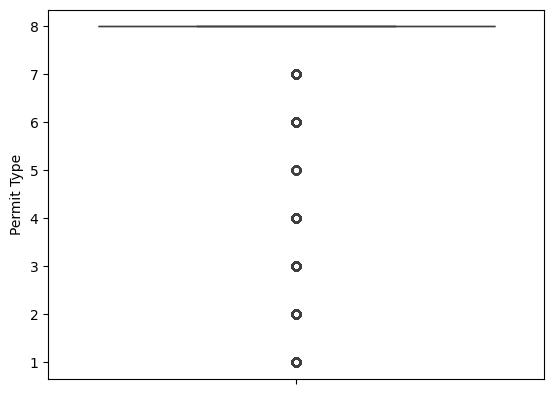

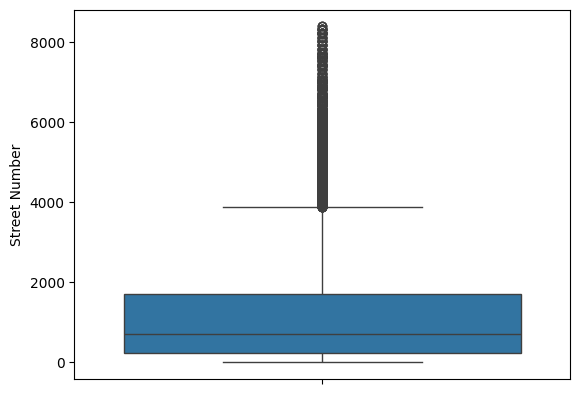

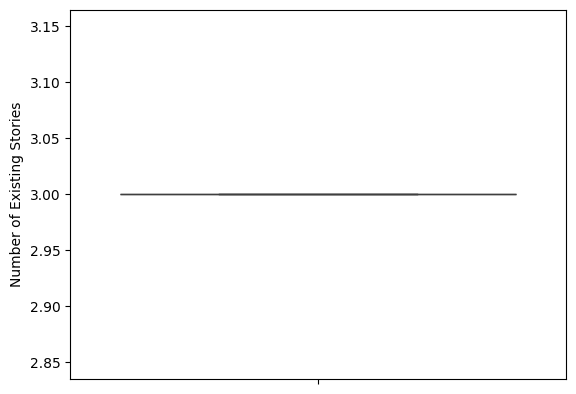

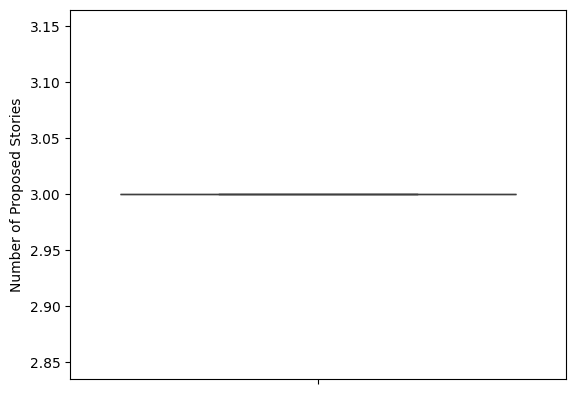

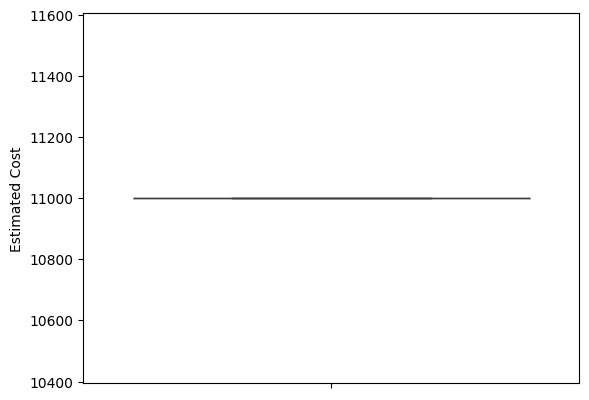

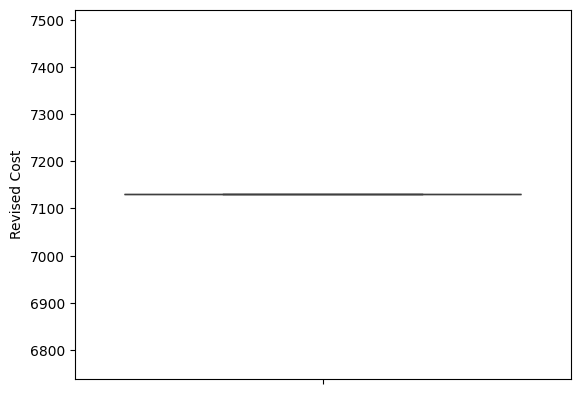

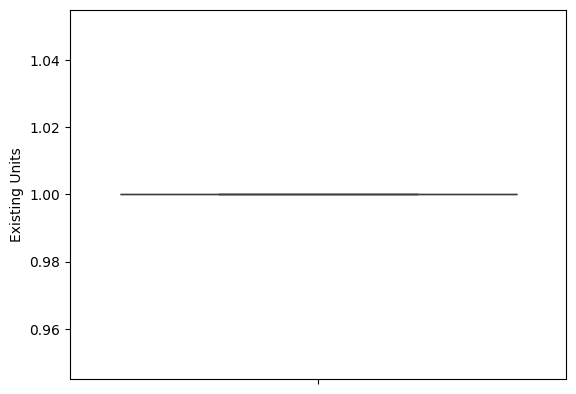

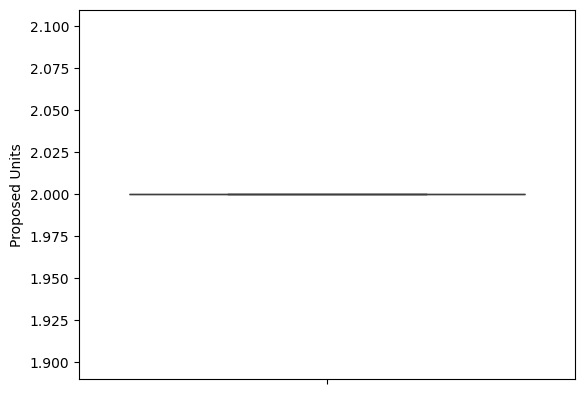

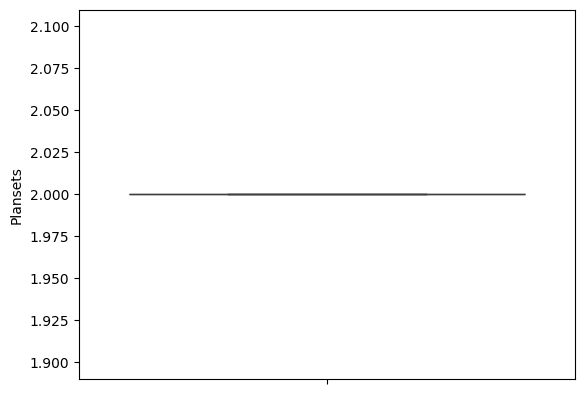

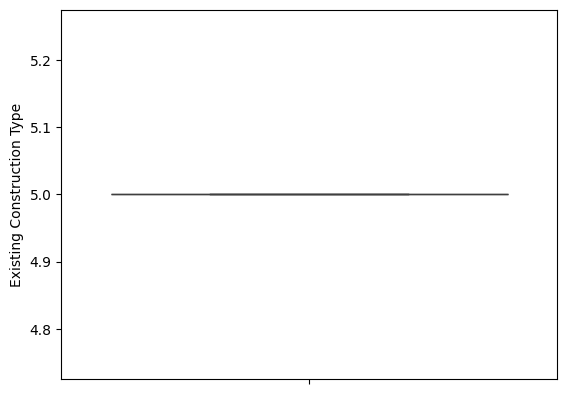

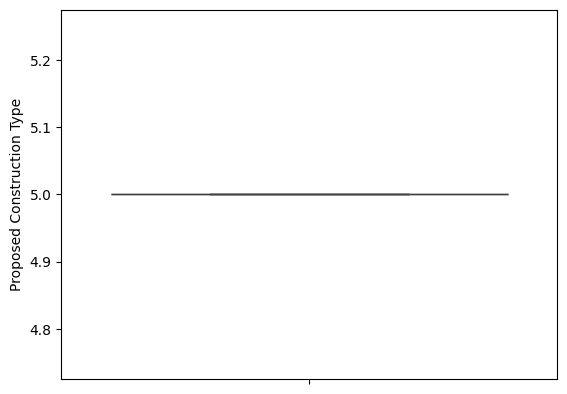

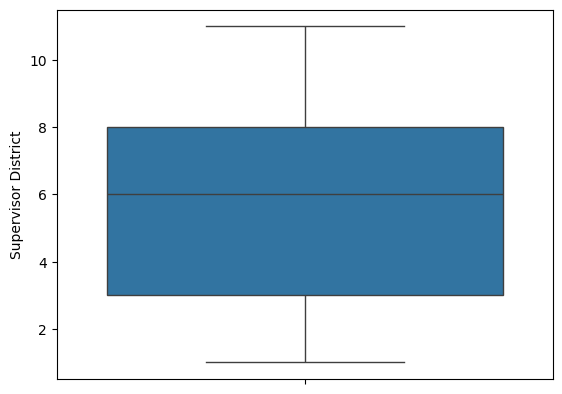

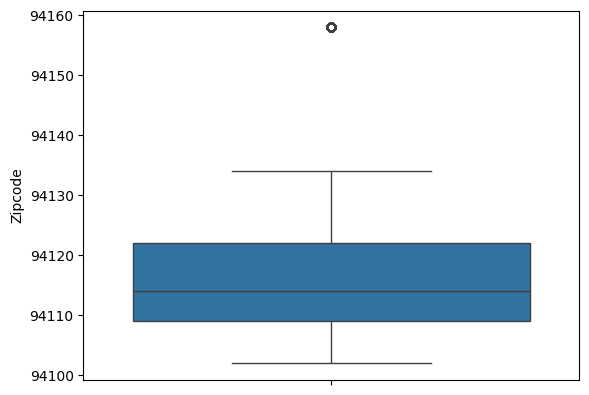

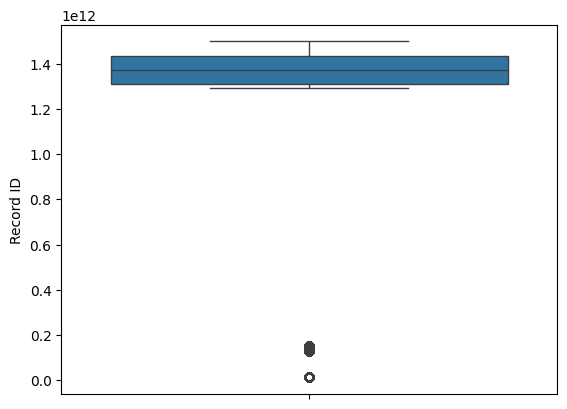

In [ ]:
numerical_feature = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
for feature in numerical_feature:
  sns.boxplot(df[feature])
  plt.show()

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df[numerical_feature]))
outliers = np.where(z>3)

In [ ]:

outlier_indices = np.where(z > 3)[0]
sample_outliers = np.random.choice(outlier_indices, size=100, replace=False)
df_outliers_sample = df.iloc[sample_outliers]
print(df_outliers_sample)


       Permit Number  Permit Type            Permit Type Definition  \
184745  201710030241            3  additions alterations or repairs   
82848   201504173999            3  additions alterations or repairs   
182799  201709158435            3  additions alterations or repairs   
159692  201706209771            3  additions alterations or repairs   
173351  201607283657            3  additions alterations or repairs   
85707   201505146336            3  additions alterations or repairs   
60186   201409085637            8            otc alterations permit   
4256    201302130124            3  additions alterations or repairs   
146847  201701066676            3  additions alterations or repairs   
192287  201712186757            3  additions alterations or repairs   
63845        M525927            8            otc alterations permit   
84973   201505085723            8            otc alterations permit   
39780   201402219033            3  additions alterations or repairs   
72179 

In [ ]:
df = df[(z <= 3)]


In [ ]:
df.shape

(194168, 33)

In [ ]:
df.head(20)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,NaN,4.0,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,94102.0,NaN,1380611233945
1,NaN,4.0,NaN,NaN,NaN,NaN,440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,94102.0,NaN,1420164406718
2,NaN,NaN,NaN,NaN,NaN,NaN,1647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,94109.0,NaN,1424856504716
3,NaN,8.0,NaN,NaN,NaN,NaN,1230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,94109.0,NaN,1443574295566
4,NaN,6.0,NaN,NaN,NaN,NaN,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,94102.0,NaN,144548169992
5,NaN,8.0,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,94107.0,NaN,1466911170855
6,NaN,8.0,NaN,NaN,NaN,NaN,1291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,94122.0,NaN,1468970403692
7,NaN,8.0,NaN,NaN,NaN,NaN,1465.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,94124.0,NaN,1469035175050
8,NaN,8.0,NaN,NaN,NaN,NaN,2094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,94117.0,NaN,1469198253772
9,NaN,8.0,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,94117.0,NaN,146932394171


In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Permit Number',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Name',
 'Street Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'First Construction Document Date',
 'Existing Use',
 'Proposed Use',
 'Existing Construction Type Description',
 'Proposed Construction Type Description',
 'Neighborhoods - Analysis Boundaries',
 'Location']

In [ ]:
for feature in categorical_features:
    temp = df.groupby(feature).size() / len(df)
    temp_df = temp[temp < 0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare_df')


In [ ]:
df[categorical_features].head(20)


,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Existing Use,Proposed Use,Existing Construction Type Description,Proposed Construction Type Description,Neighborhoods - Analysis Boundaries,Location
0,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
1,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
2,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
3,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
4,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
5,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
6,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
7,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
8,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
9,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df,Rare_df
